## What is Regression?

Regression is a mathematical technique used in machine learning and statistics to predict a continuous value based on some input data.

## What is Linear Regression?


Linear regression is a type of regression used to predict a coninuous value based on one or more input features.

## An Example of Linear Regression

If given a task to predict house prices based on size, linear regression is very usefull to apply here.

## Mathematical formula of Linear Regression

The formula for linear regression is:


                            y = wx + b


y: the value we want to predict i.e output.

x: the known value or feature i.e input

w: the weight vector

b: bias

## Mathematical Foundation of Linear Regression

#### **Loss Function (Mean Squared Error - MSE)**  

The **Loss Function** measures how well the **predicted outputs** match the **actual outputs**.  

The **Mean Squared Error (MSE)** is defined as:


$$ \mbox{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $$

Where:  
n: number of data points

y: actual output

y^: predicted output


#### **Mini-Batch Stochastic Gradient Descent (SGD)**  

Optimization means adjusting the models parameters to reduce the loss.

Gradient descent is an optimization algorithm used to minimize the loss function by adjusting the models parameters (weights and bias).

It calculates the gradient (slope) of the loss function and then updates the parameters in the direction that reduces the error.

+gradient => ground slopes upward in front of you, and to go downhill you need to step backwards  

-gradient => ground slopes downward in front of you, keep moving in that direction.  

Mini-batch SGD: updates parameters using a small subset of the dataset at each step.  

The update rules for weights and bias are:

$$
w = w - \eta \frac{\partial L}{\partial w}, \quad b = b - \eta \frac{\partial L}{\partial b}
$$

Where:  
- w: weight parameter
- b: bias parameter  
- η: learning rate
- ∂L/∂w : partial derivative of the loss fucntion with respect to the weights, calculated on the mini-batch
- ∂L/∂b : partial derivative of the loss function with respect to the bias, calculated on the minibatch

## Implement Linear Regression from Scratch

1. Define the linear Regession Model

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    """
    A Linear Regression Model with key PyTorch methods.
    """
    def __init__(self, input_dim=1, output_dim=1):
        super(LinearRegressionModel, self).__init__()
        self.layer = nn.Linear(input_dim, output_dim, bias=True)

    def forward(self, x):
        """
        Forward pass: Predict output y given input x.
        """
        return self.layer(x)

    def loss(self, y_pred, y_true):
        """
        Calculate the Mean Squared Error loss.
        """
        loss_fn = nn.MSELoss()
        return loss_fn(y_pred, y_true)

    def training_step(self, batch):
        """
        Perform one training step on a batch of data.
        """
        x, y = batch
        y_pred = self.forward(x)
        loss = self.loss(y_pred, y)
        return loss

    def validation_step(self, batch):
        """
        Evaluate the model on a validation batch.
        """
        x, y = batch
        y_pred = self.forward(x)
        loss = self.loss(y_pred, y)
        return loss.item()

    def configure_optimizers(self):
        """
        Define the optimizer for model training.
        """
        return optim.SGD(self.parameters(), lr=0.01)


2. Define the loss Function

In [19]:
loss_fn = nn.MSELoss()

3. Define the optimizer

In [20]:

model = LinearRegressionModel()

optimizer = model.configure_optimizers()


4.Generating Synthetic Data

In [21]:
# Generate Synthetic Data
torch.manual_seed(42)  # For reproducibility

# Input (x) and Output (y) Data
x = torch.linspace(0, 10, 100).unsqueeze(1)  # Reshape to (100,1)
y = 2 * x + 1 + torch.randn(100, 1) * 0.5  # Add noise

5.Training Loop

In [22]:
# Training Loop
epochs = 1000
batch_size = 16

for epoch in range(epochs):
    for i in range(0, len(x), batch_size):
        # Get Mini-Batch
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]

        # Forward Pass
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        # Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')


Epoch [0/1000], Loss: 0.1348
Epoch [100/1000], Loss: 0.0949
Epoch [200/1000], Loss: 0.0952
Epoch [300/1000], Loss: 0.0952
Epoch [400/1000], Loss: 0.0952
Epoch [500/1000], Loss: 0.0952
Epoch [600/1000], Loss: 0.0952
Epoch [700/1000], Loss: 0.0952
Epoch [800/1000], Loss: 0.0952
Epoch [900/1000], Loss: 0.0952


6.Evaluating the Model

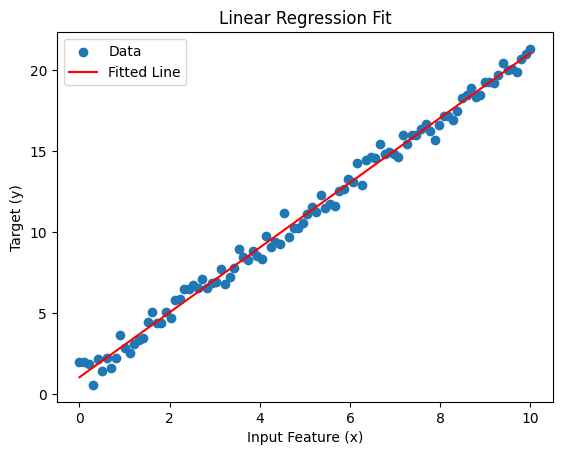

In [23]:
model.eval()
with torch.no_grad():
    y_pred = model(x)

# Plot Predictions
import matplotlib.pyplot as plt

plt.scatter(x.numpy(), y.numpy(), label='Data')
plt.plot(x.numpy(), y_pred.numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('Input Feature (x)')
plt.ylabel('Target (y)')
plt.legend()

The graph above shows the result of training a linear regression model on the synthetic data.

1. The blue dots:

  *   Represent the actual data points (input-output pairs).

  *   Each dot shows an (x, y) pair from the dataset.

  *   The scatter of points indicates some noise in the data.


2. The Red Line:
    * Shows the predicted relationship between x-input and y-output found by the model
    * The line is the best fit straight line calculated to minimize the MSE


3. X-axis : Represents the independent variable


4. Y-axis : Represents the dependent variable





##Interpreting the Graph


* The red line closely follows the trend of the blue dots, showing that the model successfully captured the linear relationship between x and y.


* The scatter (spread) of the blue dots around the red line shows residual noise (imperfections in predictions due to random noise in the data).


* The model is well-fitted because the red line passes through the general center of the data points.